# Proyek Analisis Sentimen - Fachreza Riyanda

## Import Library and Read Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sentimental_analysis_tweets.csv')

In [3]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [5]:
df.shape

(10314, 3)

## Feature Extraction and Labeling

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [7]:
# Ekstraksi fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['message to examine']).toarray()

In [8]:
# Pelabelan data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label (depression result)'])

In [9]:
# Split data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Using Machine Learning Training Algorithms

### Modul 1 : Logistic Regression 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')


Logistic Regression Accuracy: 0.9873969946679593


### Model 2 : Random Forest 

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)
accuracy_rf_clf = accuracy_score(y_test, y_pred_rf_clf)
print(f'Random Forest Accuracy: {accuracy_rf_clf}')

Random Forest Accuracy: 0.9966068831798351


### Model 3 : Support Vector Machine (SVM) 

In [12]:
from sklearn.svm import SVC

# Support Vector Machine
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm_clf = svm_clf.predict(X_test)
accuracy_svm_clf = accuracy_score(y_test, y_pred_svm_clf)
print(f'SVM Accuracy: {accuracy_svm_clf}')


SVM Accuracy: 0.9951526902569074


## Evaluation and Inference 

In [14]:
# Menyimpan model dengan akurasi tertinggi
best_model = None
best_accuracy = 0

if accuracy_log_reg > best_accuracy:
    best_accuracy = accuracy_log_reg
    best_model = log_reg

if accuracy_rf_clf > best_accuracy:
    best_accuracy = accuracy_rf_clf
    best_model = rf_clf

if accuracy_svm_clf > best_accuracy:
    best_accuracy = accuracy_svm_clf
    best_model = svm_clf

print(f'Best Model Accuracy: {best_accuracy}')


Best Model Accuracy: 0.9966068831798351


In [39]:
# Inference
def predict_sentiment(text):
    text_transformed = vectorizer.transform([text]).toarray()
    prediction = best_model.predict(text_transformed)
    return label_encoder.inverse_transform(prediction)[0]

# Contoh inference
print(predict_sentiment("This is a bad product!"))
print(predict_sentiment("I am not happy with the service."))

0
0


In [40]:
# contoh inference 2

import joblib
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

# Fungsi untuk inference
def predict_sentiment(text):
    # Load model yang telah disimpan
    loaded_model = joblib.load('best_model.pkl')
    loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')
    loaded_label_encoder = joblib.load('label_encoder.pkl')
    
    # Transformasi teks menggunakan vectorizer yang telah diload
    text_transformed = loaded_vectorizer.transform([text]).toarray()
    
    # Melakukan prediksi dengan model yang telah diload
    prediction = loaded_model.predict(text_transformed)
    
    # Mengembalikan label kategori berdasarkan encoder yang telah diload
    label = loaded_label_encoder.inverse_transform(prediction)[0]
    
    # Mengembalikan kelas kategorikal berdasarkan label
    if label == 0:
        return 'negatif'
    elif label == 1:
        return 'netral'
    elif label == 2:
        return 'positif'

# Contoh inference
if __name__ == "__main__":
    print(predict_sentiment("This is a bad product!"))  
    print(predict_sentiment("I am not happy with the service.")) 

negatif
negatif


## Visualization of Model Accuracy Comparison 

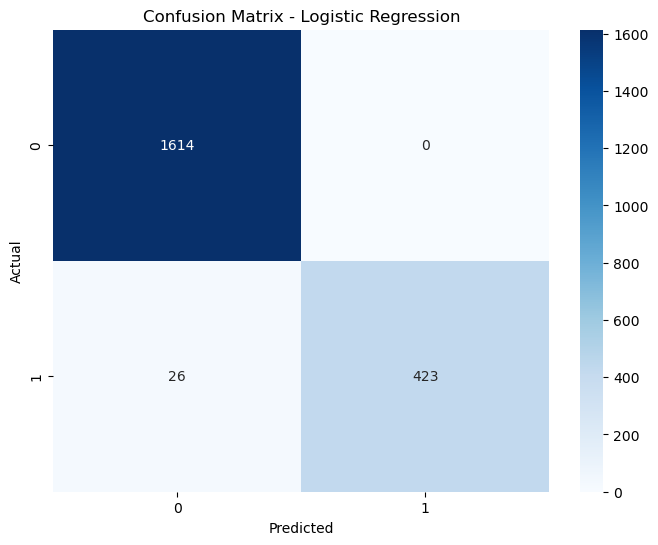

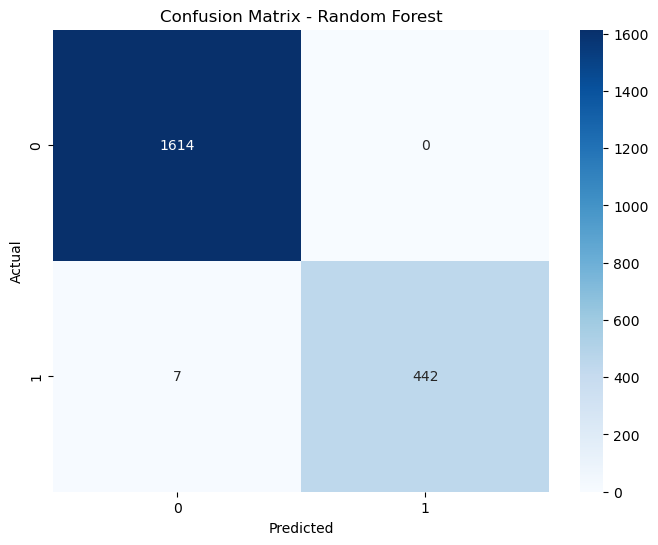

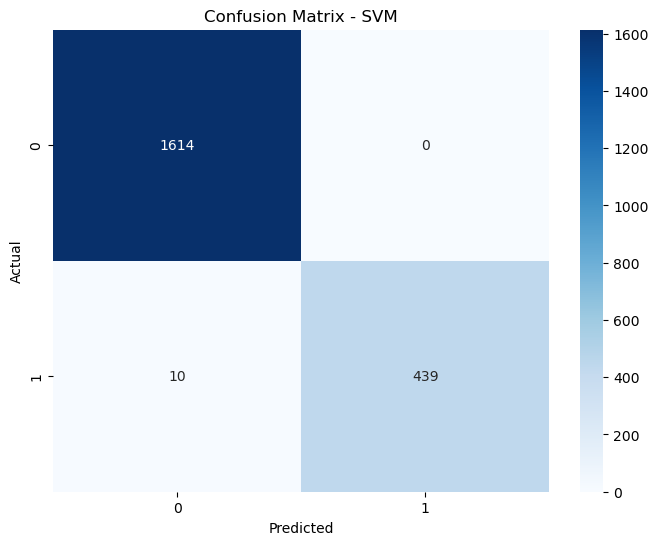

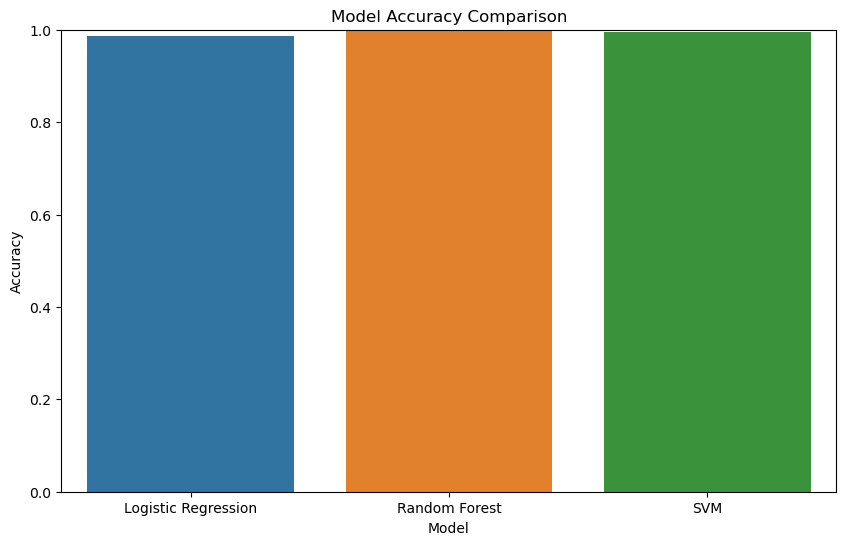

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

classes = label_encoder.classes_

plot_confusion_matrix(y_test, y_pred_log_reg, 'Confusion Matrix - Logistic Regression', classes)
plot_confusion_matrix(y_test, y_pred_rf_clf, 'Confusion Matrix - Random Forest', classes)
plot_confusion_matrix(y_test, y_pred_svm_clf, 'Confusion Matrix - SVM', classes)

# Visualisasi perbandingan akurasi model
accuracies = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_log_reg, accuracy_rf_clf, accuracy_svm_clf]
}

df_accuracies = pd.DataFrame(accuracies)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure clarity
plt.show()
